In [1]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import svm
from sklearn import metrics

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# nonlinear SVM

## 비선형 데이터 예

In [2]:
X = np.linspace(-4, 4, 9).reshape(-1, 1)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

X_poly = preprocessing.PolynomialFeatures(degree=2).fit_transform(X)

In [3]:
X, y = datasets.make_circles(n_samples=100, noise=0.05, random_state=42)

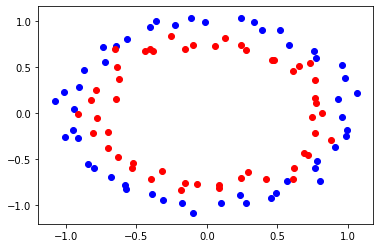

In [4]:
plt.scatter(X[y==0,0], X[y==0,1], color='blue')
plt.scatter(X[y==1,0], X[y==1,1], color='red')
plt.show()

In [5]:
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

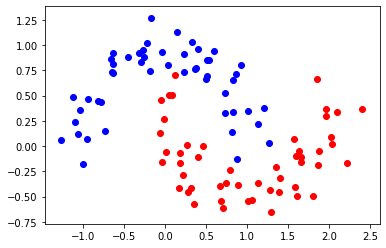

In [6]:
plt.scatter(X[y==0,0], X[y==0,1], color='blue')
plt.scatter(X[y==1,0], X[y==1,1], color='red')
plt.show()

## 좌교계 만들기 : contour plot

In [7]:
A = np.arange(3)
B = np.arange(5,9)
X1, X2 = np.meshgrid(A, B)
print(X1)
print()
print(X2)

[[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]

[[5 5 5]
 [6 6 6]
 [7 7 7]
 [8 8 8]]


In [8]:
# 방법1
for x_pt, y_pt in zip(X1, X2):
    for x, y in zip(x_pt, y_pt):
        print(x,y)

0 5
1 5
2 5
0 6
1 6
2 6
0 7
1 7
2 7
0 8
1 8
2 8


In [9]:
X1.ravel()

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2])

In [10]:
# 방법2
np.vstack((X1.ravel(), X2.ravel())).T

array([[0, 5],
       [1, 5],
       [2, 5],
       [0, 6],
       [1, 6],
       [2, 6],
       [0, 7],
       [1, 7],
       [2, 7],
       [0, 8],
       [1, 8],
       [2, 8]])

# 다항 특성 확장 방법

In [11]:
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

In [12]:
poly = preprocessing.PolynomialFeatures(degree=3)

In [13]:
X_poly = poly.fit_transform(X)

In [14]:
model = svm.SVC(C=10, kernel='linear').fit(X_poly, y)

## 예측

In [15]:
X_new = np.array([[1,-0.5], [1,0], [1,0.5]])
X_new_poly = poly.fit_transform(X_new)

print(model.decision_function(X_new_poly))
print(model.predict(X_new_poly))

[ 1.84215984 -0.75217115 -2.67586824]
[1 0 0]


## 시각화

In [16]:
X1s = np.linspace(-1.5, 2.5, 100)
X2s = np.linspace(-1, 1.5, 100)

X1, X2 = np.meshgrid(X1s, X2s) #좌표를 만들어줌

XX = np.vstack((X1.ravel(), X2.ravel())).transpose()
XX_poly = poly.fit_transform(XX)
y_pred = model.predict(XX_poly).reshape(X1.shape)

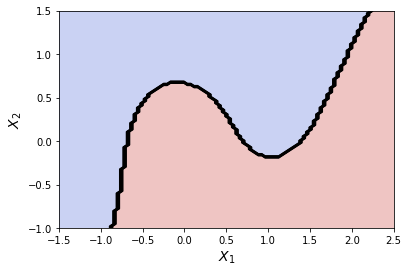

In [17]:
plt.contour(X1s, X2s, y_pred, colors='black')
plt.contourf(X1s, X2s, y_pred, cmap=plt.cm.coolwarm, alpha=0.3)

plt.xlabel('$X_1$', fontsize=14)
plt.ylabel('$X_2$', fontsize=14)

plt.show()

# Kernel

## hyperparameter tuning
높은 C : margin이 좁아지고, 오분류가 적어짐 -> overfitting

낮은 C : margin이 넓어지고, 오분류가 많아짐 -> underfitting

높은 gamma : 한 데이터에 영향을 크게 받음 -> overfitting

낮은 gamma : 한데이터에 영향을 적게 받음 -> underfittng


## 다항식(poly) 커널
특성을 지정하여 특성 차수까지 변환하여 확장하는 방식

이미지 처리 등에 사용되나, 속도가 느려 자주 사용하지 않음

In [18]:
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

In [19]:
poly_model = svm.SVC(C=10, kernel='poly',
                     degree=3, coef0=1, gamma='auto').fit(X, y)
# kernel='poly' : 다항식 커널 트릭
# degree=3 : 3차다항식 특성인 것처럼 계산
    # 클수록 overfitting의 위험
# coef0=0 : 다항식 커널과 시그모이드 커널에서 사용하는 상수값
    # 통상적으로 1을 넣음
# gamma='auto' : 커널반경의 민감도를 결정하는 값
    # 클수록 결정경계에 더욱 민감해 지므로, 더욱 부드러워 진다.

In [20]:
poly_model.predict(X_new)

array([1, 0, 0], dtype=int64)

In [21]:
poly_model.decision_function(X_new)

array([ 1.57528123, -0.24268752, -1.95292692])

## RBF 커널 (=가우시안 커널)
radial basis function : 데이터의 특성을 무한한 모든 차수의 모든 다항식으로 확장하는 방식 (즉 degree=$\infty$)

데이터가 너무 크지(10만개) 않으면 일반적으로 가장 성능이 좋음

In [22]:
rdf_model = svm.SVC(C=10, kernel='rbf',
                    gamma='auto').fit(X, y)

In [23]:
rdf_model.predict(X_new)

array([1, 0, 0], dtype=int64)

In [24]:
rdf_model.decision_function(X_new)

array([ 1.6290083 , -0.12268127, -1.86080587])

## sigmoid 커널

시그모이드 곡선의 tanh함수가 적용되며, SVM보다는 신경망 학습에서 사용

# RDF SVM 연습

In [25]:
iris = datasets.load_iris()
X = iris.data[:, (2,3)]
y = iris.target

In [26]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
clf = svm.SVC(kernel='rbf', C=10, gamma=2).fit(X_train, y_train)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
print('정확도 :',metrics.accuracy_score(y_test, y_pred))
print('오차행렬 :')
print(metrics.confusion_matrix(y_test, y_pred))
print('보고서 :')
print(metrics.classification_report(y_test, y_pred))

정확도 : 0.9777777777777777
오차행렬 :
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
보고서 :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



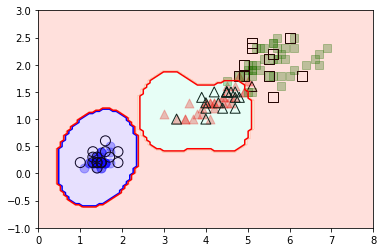

In [30]:
c_set = ['blue', 'red', 'green']
m_set = ['o', '^', 's']
l_set = iris.target_names

for t in set(y_train):
    xx = [X_train[i][0] for i in range(len(y_train)) if y_train[i]==t]
    yy = [X_train[i][1] for i in range(len(y_train)) if y_train[i]==t]
    plt.scatter(xx, yy, color=c_set[t], marker=m_set[t], \
               label=l_set[t]+' (train)',s=80, alpha=0.3)
for t in set(y_test):
    xx = [X_test[i][0] for i in range(len(y_test)) if y_test[i]==t]
    yy = [X_test[i][1] for i in range(len(y_test)) if y_test[i]==t]
    plt.scatter(xx, yy, edgecolor='black', facecolors='none',\
                marker=m_set[t], label=l_set[t]+' (test)',s=100)
    
X1s = np.linspace(0, 8, 100)
X2s = np.linspace(-1, 3, 100)
X1, X2 = np.meshgrid(X1s, X2s)

XX = np.vstack((X1.ravel(), X2.ravel())).transpose()
YY = clf.predict(XX).reshape(X1.shape)

plt.contour(X1s, X2s, YY, colors=c_set, levels=[0,1,2])
plt.contourf(X1s, X2s, YY, cmap=plt.cm.rainbow, alpha=0.15)

plt.show()

C와 gamma를 다르게 주면 다른 형태의 그림이 나타남